# 2-layer FNN on MNIST

This is MLP (784-200-200-10) on MNIST. Adam algorithm (lr=0.001) with 100 epoches.


#### 100 hidden units

    Total params: 89,610
    Trainable params: 89,610
    Non-trainable params: 0

####  200 hidden units

    Total params: 199,210
    Trainable params: 199,210
    Non-trainable params: 0

####  200 hidden units with 10 intrinsic dim

    Total params: 2,191,320
    Trainable params: 10
    Non-trainable params: 2,191,310
    
####  200 hidden units with 5000 intrinsic dim    
    Total params: 996,254,210
    Trainable params: 5,000
    Non-trainable params: 996,249,210    

In [25]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

""" Extract final stats from resman's diary file"""
def extract_num(lines0, is_reg=False):

    if is_reg:
        valid_loss_str     = lines0[-5]
        valid_accuracy_str = lines0[-6]
        train_loss_str     = lines0[-8]
        train_accuracy_str = lines0[-9]
        average_time_str   = lines0[-10]        
        run_time_str       = lines0[-11]   
        
    else: 
        valid_loss_str     = lines0[-6]
        valid_accuracy_str = lines0[-7]
        train_loss_str     = lines0[-10]
        train_accuracy_str = lines0[-11]
        average_time_str   = lines0[-12]        
        run_time_str       = lines0[-13]


    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

""" Extract number of total parameters for each net config from resman's diary file"""
def parse_num_params(line0):
    line_str = ''.join(lines0)
    idx = line_str.find("Total params")
    param_str = line_str[idx+14:idx+14+20] # 14 is the length of string "Total params: "
    param_num = param_str.split("\n")[0]
    return int(locale.atof(param_num))

In [26]:
results_dir = '../results/fnn_mnist_l2_dir_reg' 
print results_dir

l2_value = [1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001,0]

l2_value_str = []
for i in range(len(l2_value)):
    if i<len(l2_value)-1:       
        v = format(l2_value[i], '.'+str(i)+'f') 
    else:    
        v = format(l2_value[i], '.'+str(0)+'f') 
    l2_value_str.append(v)
    
print l2_value_str
# dim = [0,250,500,750,1000,1250,1500,1750,1900,1950,2000,2050,2100,2250,2500,3000,4000,5000,5250,5500,5750,6000,6250,6500,6750,7000,7250,7500,7750,8000,8250,8500,8750,9000,9250,9500,9750,10000,15000,20000,25000,30000,35000,40000,45000,50000]
dim = [0]

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)
# print diary_names
          
Rs = []    
diary_names_ordered = []
error_files = []

for l2 in l2_value_str:
    for d in dim:
        for f in diary_names:
            if '_'+str(d)+ '_2_200_'+ l2 +'/' in f:
                # print "%d is in" % d + f
                diary_names_ordered.append(f)        

                with open(f,'r') as ff:
                    lines0 = ff.readlines()
                    try:
                        R = extract_num(lines0, l2=='0')
                    except ValueError: 
                        error_files.append((l2,d))
                        R = np.zeros(len(R))
                        print "Error. Can not read config: reg %f and dim %d." % (l2, d) 

                    print "L2 penalty: "+l2+ "\n"  + str(R) + "\n"                

                    Rs.append(R)
                                        
Rs = np.array(Rs)
print Rs.shape

../results/fnn_mnist_l2_dir_reg
['1', '0.1', '0.01', '0.001', '0.0001', '0.00001', '0.000001', '0.0000001', '0.00000001', '0.000000001', '0']
17.10.06.13.56.52.078   final_stats val_accuracy 0.1009

L2 penalty: 1
(2.30513, 0.1009, 2.30388, 0.10786, 107.788)

17.10.06.13.59.21.789   final_stats val_accuracy 0.3702

L2 penalty: 0.1
(2.26632, 0.3702, 2.27208, 0.3774, 121.687)

17.10.06.13.57.06.191   final_stats val_accuracy 0.8779

L2 penalty: 0.01
(0.834621, 0.8779, 0.830635, 0.89026, 106.953)

17.10.06.13.57.09.119   final_stats val_accuracy 0.9697

L2 penalty: 0.001
(0.250095, 0.9697, 0.240817, 0.972, 105.023)

17.10.06.13.57.09.726   final_stats val_accuracy 0.979

L2 penalty: 0.0001
(0.0960051, 0.979, 0.0398964, 0.99892, 105.282)

17.10.06.13.59.29.778   final_stats val_accuracy 0.9818

L2 penalty: 0.00001
(0.0738053, 0.9818, 0.00647127, 1.0, 117.099)

17.10.06.13.56.49.973   final_stats val_accuracy 0.982

L2 penalty: 0.000001
(0.0997598, 0.982, 0.00143469, 1.0, 107.207)

17.10.06.

## Performance comparison with Baseline

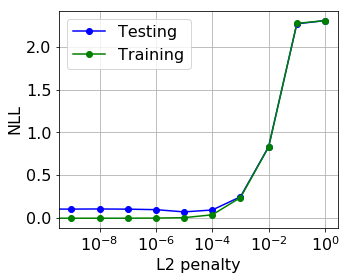

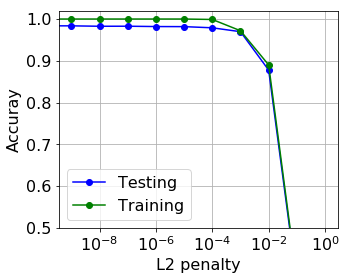

In [44]:
N = 11

# plot nll
fig, ax = subplots(1)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

ax.plot(l2_value, Rs[:,0],'bo-', label="Testing")
ax.plot(l2_value, Rs[:,2],'go-', label="Training")

ax.set_xlabel('L2 penalty')
ax.set_ylabel('NLL')
ax.set_xscale('log')
ax.legend()
ax.grid()
# ax.set_ylim([-0.1,1.1])
fig.set_size_inches(5, 4)



# plot acc
fig, ax = subplots(1)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

ax.plot(l2_value, Rs[:,1],'bo-', label="Testing")
ax.plot(l2_value, Rs[:,3],'go-', label="Training")

ax.set_xlabel('L2 penalty')
ax.set_ylabel('Accuray')
ax.set_xscale('log')
ax.legend()
ax.grid()
ax.set_ylim([0.5,1.02])
fig.set_size_inches(5, 4)

## Performance Per Dim